In [4]:
import load_utils
import plot_utils 
from pathlib import Path

In [ ]:
path_PD = Path('./pipline/pd/outputs/ants/anat-12dofs')
path_HC = Path('./pipline/hc/outputs/ants/anat-12dofs')

In [ ]:
paths_PD = load_utils.get_paths(path_PD, Path("./PD_selected_subjects.txt"), pattern="_ses-BLWarped", ext=".nii.gz")
paths_HC = load_utils.get_paths(path_HC, Path("./HC_selected_subjects.txt"), pattern="_ses-BLWarped", ext=".nii.gz")

In [2]:
fsl_path_PD = Path('./pipline/pd/outputs/anat-12dofs')
fsl_path_HC = Path('./pipline/hc/outputs/anat-12dofs')

In [4]:
fsl_paths_PD = load_utils.get_paths(fsl_path_PD, Path("./PD_selected_subjects.txt"), pattern="_ses-BL", ext=".nii.gz")
fsl_paths_HC = load_utils.get_paths(fsl_path_HC, Path("./HC_selected_subjects.txt"), pattern="_ses-BL", ext=".nii.gz")

In [14]:
# def create_directory(path):
#     if not path.exists():
#         path.mkdir(parents=True, exist_ok=True)

# def generate_gif(images, save_path):
#     with Image.open(images[0]) as frame_one:
#         frame_one.save(
#             save_path, format="GIF", append_images=[Image.open(image) for image in images[1:]],
#             save_all=True, duration=200, loop=0
#         )

# def process_images(image_paths, title_prefix, output_dir):
#     mni_template = datasets.load_mni152_template()
#     for path in image_paths:
#         try:
#             img = nib.load(path)
#             output_file = output_dir / f"{title_prefix}_{path.parent.name}.png"
#             # display = plotting.plot_anat(mni_template, title='Contours on MNI template')
#             display = plotting.plot_anat(img, cut_coords=(10,10,1), title=title_prefix, dim=-0.5)
#             display.add_contours(mni_template, cut_coords=(10,10,1), levels=[0.6], colors='r')
#             display.savefig(str(output_file))  # This will save the figure with the contour
#             display.close()
#         except Exception as e:
#             print(f"Error processing {path}: {e}")

In [15]:
# create_directory(Path("./outputs_plots"))

In [16]:
# paths = [Path.cwd() / Path(p) for p in paths_HC["sub-3171"]["mca"]]
# process_images(paths, "sub-3570_fsl",Path("./outputs_plots"))

In [17]:

# png_files = sorted(Path("./outputs_plots").glob("*.png"))
# generate_gif(png_files,  Path("./outputs_plots/gif") / "sub-3171_fsl.gif")

In [18]:
# from nilearn import plotting, datasets

# # Load the MNI template (or use your own statistical map)
# mni_template = datasets.load_mni152_template()

# # Plot the template with contours
# display = plotting.plot_anat(mni_template, title='Contours on MNI template')
# display.add_contours(mni_template, levels=[.5], colors='r')

In [21]:
for sub in paths_HC.keys():
    plot_utils.make_gif(paths_HC[sub]["mca"], sub, Path("./outputs_plots/ants/hc"), duration=200, cut_coords=(0,0,0))

__


/lustre06/project/6061841/niusham/mca_linear_registration/.venv/lib/python3.11/site-packages/nilearn/plotting/displays/_axes.py:74: UserWarning: The following kwargs were not used by contour: 'cut_coords'
  im = getattr(ax, type)(


__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
_

In [22]:
for sub in paths_PD.keys():
    plot_utils.make_gif(paths_PD[sub]["mca"], sub, Path("./outputs_plots/ants/pd"), duration=200, cut_coords=(0,0,0))

__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
_

In [5]:
for sub in fsl_paths_HC.keys():
    plot_utils.make_gif(fsl_paths_HC[sub]["mca"], sub, Path("./outputs_plots/fsl/hc"), duration=200, cut_coords=(0,0,0))

__


/lustre06/project/6061841/niusham/mca_linear_registration/.venv/lib/python3.11/site-packages/nilearn/plotting/displays/_axes.py:74: UserWarning: The following kwargs were not used by contour: 'cut_coords'
  im = getattr(ax, type)(


__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
_

In [6]:
for sub in fsl_paths_PD.keys():
    plot_utils.make_gif(fsl_paths_PD[sub]["mca"], sub, Path("./outputs_plots/fsl/pd"), duration=200, cut_coords=(0,0,0))

__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
__
_

In [1]:
import importlib
import plot_utils 
importlib.reload(plot_utils)

<module 'plot_utils' from '/lustre06/project/6061841/niusham/mca_linear_registration/plot_utils.py'>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dir = "/home/niusham/projects/rrg-jbpoline/niusham/mca_linear_registration/outputs_plots/diagrams"

In [10]:
ANTS_FD_HC_all = np.loadtxt((dir+"/ANTS_FD_HC_all.txt"))
ANTS_FD_PD_all = np.loadtxt((dir+"/ANTS_FD_PD_all.txt"))

FSL_FD_HC_all = np.loadtxt((dir+"/FSL_FD_HC_all.txt"))
FSL_FD_PD_all = np.loadtxt((dir+"/FSL_FD_PD_all.txt"))

(array([42.,  4.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.]),
 array([0.0116851 , 0.84105752, 1.67042994, 2.49980236, 3.32917478,
        4.1585472 , 4.98791962, 5.81729204, 6.64666446, 7.47603688,
        8.3054093 ]),
 <BarContainer object of 10 artists>)

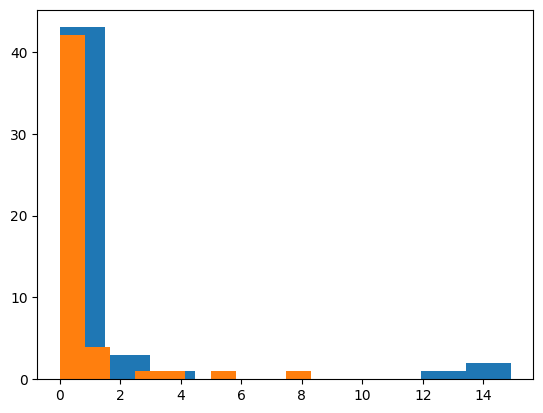

In [5]:
plt.hist(np.std(ANTS_FD_HC_all, axis=1))
plt.hist(np.std(ANTS_FD_PD_all, axis=1))

(array([43.,  5.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.01387803, 0.10533004, 0.19678205, 0.28823406, 0.37968608,
        0.47113809, 0.5625901 , 0.65404211, 0.74549412, 0.83694613,
        0.92839814]),
 <BarContainer object of 10 artists>)

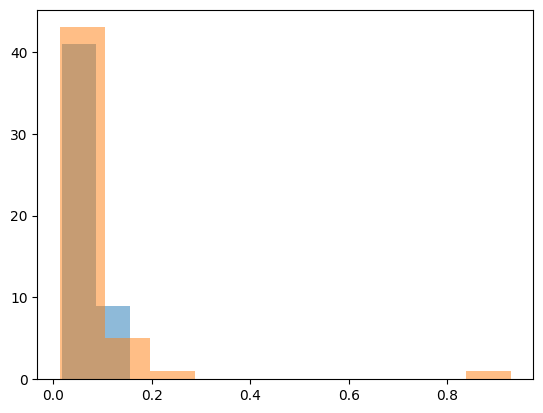

In [6]:
plt.hist(np.std(FSL_FD_HC_all, axis=1), alpha=0.5, bins=2)
plt.hist(np.std(FSL_FD_PD_all, axis=1), alpha=0.5)

In [5]:
from scipy import stats

In [7]:
# ANTS_FD_HC_fine = np.loadtxt((dir+"/ANTS_FD_HC_fine.txt"))
# ANTS_FD_PD_fine = np.loadtxt((dir+"/ANTS_FD_PD_fine.txt"))

# FSL_FD_HC_fine = np.loadtxt((dir+"/FSL_FD_HC_fine.txt"))
# FSL_FD_PD_fine = np.loadtxt((dir+"/FSL_FD_PD_fine.txt"))
# FSL = np.concatenate([np.std(FSL_FD_HC_fine, axis=1), np.std(ANTS_FD_PD_fine, axis=1)])
# ANTS = np.concatenate([np.std(ANTS_FD_HC_fine, axis=1), np.std(ANTS_FD_PD_fine, axis=1)])

In [11]:
FSL = np.concatenate([np.std(FSL_FD_HC_all, axis=1), np.std(FSL_FD_PD_all, axis=1)])
ANTS = np.concatenate([np.std(ANTS_FD_HC_all, axis=1), np.std(ANTS_FD_PD_all, axis=1)])

In [12]:
stats.ttest_rel(np.log(FSL), np.log(ANTS))

TtestResult(statistic=-4.591163346331987, pvalue=1.2968993870126403e-05, df=99)

In [28]:
stats.ttest_ind(np.log(np.std(FSL_FD_HC_all, axis=1)), np.log(np.std(FSL_FD_PD_all, axis=1)))

TtestResult(statistic=-0.4267504587047878, pvalue=0.6704971272219064, df=98.0)

In [27]:
stats.ttest_ind(np.log(np.std(ANTS_FD_HC_all, axis=1)), np.log(np.std(ANTS_FD_PD_all, axis=1)))

TtestResult(statistic=0.7435923685979966, pvalue=0.4589021748800115, df=98.0)

In [11]:
stats.ttest_rel(np.log(np.std(FSL_FD_HC_all, axis=1)), np.log(np.std(ANTS_FD_HC_all, axis=1)))

TtestResult(statistic=-3.9978686141252817, pvalue=0.00021493219731260062, df=49)

In [12]:
stats.ttest_rel(np.log(np.std(FSL_FD_PD_all, axis=1)), np.log(np.std(ANTS_FD_PD_all, axis=1)))

TtestResult(statistic=-3.2875170335838253, pvalue=0.0018740761283189146, df=49)

In [13]:
stats.ttest_rel(np.log(FSL), np.log(ANTS))

TtestResult(statistic=-5.164067343579009, pvalue=1.2511312970495668e-06, df=99)

In [14]:
stats.ttest_rel(np.log(FSL), np.log(ANTS))

TtestResult(statistic=-5.164067343579009, pvalue=1.2511312970495668e-06, df=99)

(array([ 4., 16., 27., 32., 10.,  9.,  1.,  0.,  0.,  1.]),
 array([-4.27744816, -3.8571328 , -3.43681745, -3.01650209, -2.59618674,
        -2.17587138, -1.75555603, -1.33524067, -0.91492532, -0.49460996,
        -0.07429461]),
 <BarContainer object of 10 artists>)

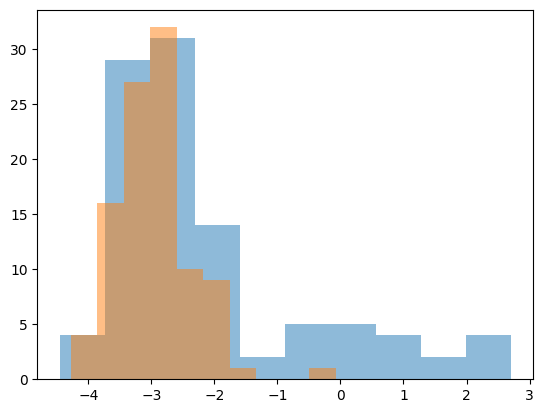

In [15]:
plt.hist(np.log(ANTS), alpha=0.5)
plt.hist(np.log(FSL), alpha=0.5)

In [16]:
stats.ttest_ind(np.log(np.std(FSL_FD_HC_all, axis=1)), np.log(np.std(FSL_FD_PD_all, axis=1)))

TtestResult(statistic=-0.4267504587047878, pvalue=0.6704971272219064, df=98.0)

In [17]:
stats.ttest_ind(np.log(np.std(ANTS_FD_HC_all, axis=1)), np.log(np.std(ANTS_FD_PD_all, axis=1)))

TtestResult(statistic=0.2620623603345541, pvalue=0.7938234144519152, df=98.0)

In [18]:
FSL = np.concatenate([FSL_FD_HC_all, FSL_FD_PD_all])
ANTS = np.concatenate([ANTS_FD_HC_all,ANTS_FD_PD_all])

In [19]:
FSL.shape

(100, 10)

Text(0, 0.5, 'mean')

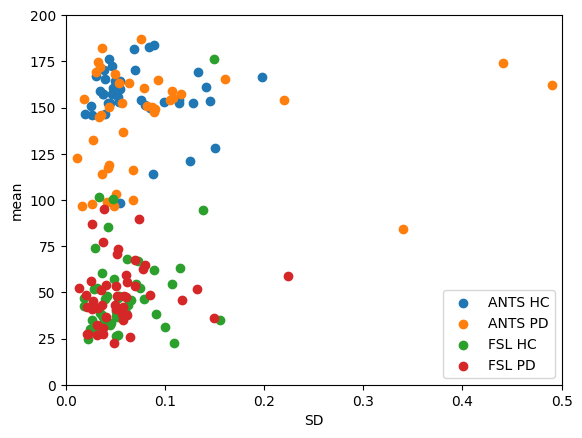

In [69]:
plt.scatter(np.std(ANTS_FD_HC_all, axis=1), np.mean(ANTS_FD_HC_all, axis=1) )
plt.scatter(np.std(ANTS_FD_PD_all, axis=1), np.mean(ANTS_FD_PD_all, axis=1) )
plt.scatter(np.std(FSL_FD_HC_all, axis=1), np.mean(FSL_FD_HC_all, axis=1) )
plt.scatter(np.std(FSL_FD_PD_all, axis=1), np.mean(FSL_FD_PD_all, axis=1) )
plt.legend(["ANTS HC", "ANTS PD", "FSL HC", "FSL PD"])
plt.xlim((0,0.5))
plt.ylim((0,200))
plt.xlabel("SD")
plt.ylabel("mean")

Text(0, 0.5, 'mean')

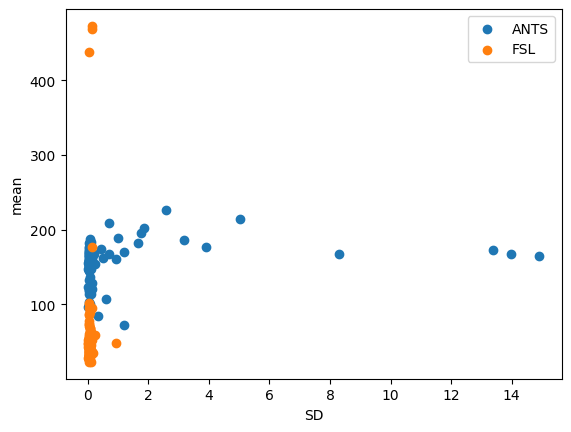

In [20]:
plt.scatter(np.std(ANTS, axis=1), np.mean(ANTS, axis=1) )

plt.scatter(np.std(FSL, axis=1), np.mean(FSL, axis=1) )

plt.legend(["ANTS", "FSL"])
plt.xlabel("SD")
plt.ylabel("mean")

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [18]:
def create_directory(path):
    if not path.exists():
        path.mkdir(parents=True, exist_ok=True)

In [19]:
def hist_plotter(data_1, data_2, title, labels=None, path=None, bins=[10, 10], s=10, xlable=None):

    if labels is None:
        labels = ["Software 1", "Software 2"]

    if data_1.ndim == 1:
        data_1 = data_1.reshape(-1, 1)
        data_2 = data_2.reshape(-1, 1)

    dims = data_1.shape[-1]

    for i in range(dims):
        plt.subplot(1, dims, i + 1)
        plt.hist(data_1[:, i], color="r", alpha=0.2, bins=bins[0], label=labels[0])
        plt.hist(data_2[:, i], color="b", alpha=0.2, bins=bins[1], label=labels[1])
        median1 = np.median(data_1[:, i])
        median2 = np.median(data_2[:, i])
        plt.axvline(median1, color="r", linestyle="dashed", linewidth=1)
        plt.axvline(median2, color="b", linestyle="dashed", linewidth=1)
        plt.text(median1, plt.ylim()[1] / 2, f"Median: {median1:.2f}", color="r", ha="right", rotation=90)
        plt.text(median2 * s, plt.ylim()[1] / 2, f"Median: {median2:.2f}", color="b", ha="left", rotation=90)
        if i == 1 or (i == 0 and dims == 1):
            plt.title(title)
        plt.legend()

        if xlable:
            plt.xlabel(xlable)

        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.75, hspace=0.75)
        plt.tight_layout()

        if path:
            create_directory(path)
            plt.savefig(path / f"{title}.png")
        plt.show()

In [5]:
path = "/home/niusham/projects/rrg-jbpoline/niusham/mca_linear_registration/outputs_plots/diagrams"
path = Path(path)
ANTS_mad_fine_PD = np.loadtxt(path/ "ANTS_mad_fine_PD.txt")
ANTS_mad_fine_HC = np.loadtxt(path / "ANTS_mad_fine_HC.txt")

ANTS_mad_failed_PD = np.loadtxt(path / "ANTS_mad_failed_PD.txt")
ANTS_mad_failed_HC = np.loadtxt(path / "ANTS_mad_failed_HC.txt")

ANTS_mad_all_PD = np.loadtxt(path / "ANTS_mad_all_PD.txt")
ANTS_mad_all_HC = np.loadtxt(path / "ANTS_mad_all_HC.txt")

FSL_mad_fine_PD = np.loadtxt(path / "FSL_mad_fine_PD.txt")
FSL_mad_fine_HC = np.loadtxt(path/ "FSL_mad_fine_HC.txt")

FSL_mad_failed_PD = np.loadtxt(path/ "FSL_mad_failed_PD.txt")
FSL_mad_failed_HC = np.loadtxt(path/ "FSL_mad_failed_HC.txt")

FSL_mad_all_PD = np.loadtxt(path / "FSL_mad_all_PD.txt")
FSL_mad_all_HC = np.loadtxt(path / "FSL_mad_all_HC.txt")

/tmp/ipykernel_1910952/2964704483.py:6: UserWarning: loadtxt: input contained no data: "/home/niusham/projects/rrg-jbpoline/niusham/mca_linear_registration/outputs_plots/diagrams/ANTS_mad_failed_PD.txt"
  ANTS_mad_failed_PD = np.loadtxt(path / "ANTS_mad_failed_PD.txt")


In [6]:
FSL_mad_fine = np.concatenate([FSL_mad_fine_PD, FSL_mad_fine_HC])
ANTS_mad_fine = np.concatenate([ANTS_mad_fine_HC, ANTS_mad_fine_PD])

FSL_mad_fail = np.concatenate([FSL_mad_failed_PD, FSL_mad_failed_HC])
ANTS_mad_fail = np.concatenate([ANTS_mad_failed_HC])

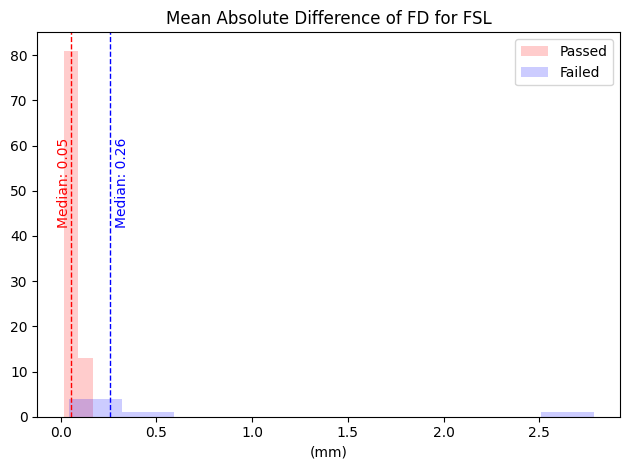

In [14]:
hist_plotter(FSL_mad_fine, FSL_mad_fail, "Mean Absolute Difference of FD for FSL", s=1.1, bins=[2,10], labels=["Passed", "Failed"], xlable="(mm)")

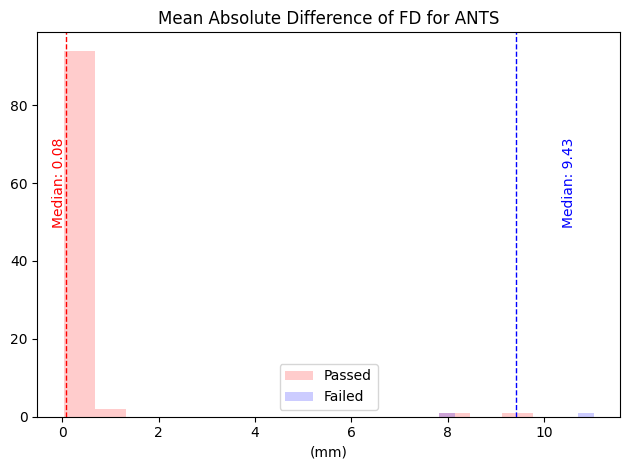

In [15]:
hist_plotter(ANTS_mad_fine, ANTS_mad_fail, "Mean Absolute Difference of FD for ANTS", s=1.1, bins=[15,10], labels=["Passed", "Failed"], xlable="(mm)")

In [16]:
np.mean(ANTS_mad_fine)

0.29715152963393143

In [18]:
np.max(ANTS_mad_fine)

9.77327768911134

In [21]:
ANTS_mad_fine[ANTS_mad_fine > 0.25]

array([9.77327769, 0.27375439, 0.26628928, 1.15458703, 1.30790525,
       8.31050574])

In [17]:
np.mean(FSL_mad_fine)

0.06064204702797047

In [19]:
np.max(FSL_mad_fine)

0.16868111441029612

In [22]:
FSL_mad_fine[FSL_mad_fine > 0.25]

array([], dtype=float64)

In [13]:
dir = "/home/niusham/projects/rrg-jbpoline/niusham/mca_linear_registration/outputs_plots/diagrams"
ANTS_FD_HC_fine = np.loadtxt((dir+"/ANTS_FD_HC_fine.txt"))
ANTS_FD_PD_fine = np.loadtxt((dir+"/ANTS_FD_PD_fine.txt"))

FSL_FD_HC_fine = np.loadtxt((dir+"/FSL_FD_HC_fine.txt"))
FSL_FD_PD_fine = np.loadtxt((dir+"/FSL_FD_PD_fine.txt"))

ANTS_FD_HC_fail = np.loadtxt((dir+"/ANTS_FD_HC_failed.txt"))
ANTS_FD_PD_fail = np.loadtxt((dir+"/ANTS_FD_PD_failed.txt"))

FSL_FD_HC_fail = np.loadtxt((dir+"/FSL_FD_HC_failed.txt"))
FSL_FD_PD_fail = np.loadtxt((dir+"/FSL_FD_PD_failed.txt"))

/tmp/ipykernel_842802/3385825616.py:9: UserWarning: loadtxt: input contained no data: "/home/niusham/projects/rrg-jbpoline/niusham/mca_linear_registration/outputs_plots/diagrams/ANTS_FD_PD_failed.txt"
  ANTS_FD_PD_fail = np.loadtxt((dir+"/ANTS_FD_PD_failed.txt"))


In [14]:
dir = "/home/niusham/projects/rrg-jbpoline/niusham/mca_linear_registration/outputs_plots/diagrams"
ANTS_FD_HC_fine_re = np.loadtxt((dir+"/ANTS_new_FD_HC_fine.txt"))
ANTS_FD_PD_fine_re = np.loadtxt((dir+"/ANTS_new_FD_PD_fine.txt"))

FSL_FD_HC_fine_re = np.loadtxt((dir+"/FSL_new_FD_HC_fine.txt"))
FSL_FD_PD_fine_re = np.loadtxt((dir+"/FSL_new_FD_PD_fine.txt"))

ANTS_FD_HC_fail_re = np.loadtxt((dir+"/ANTS_new_FD_HC_failed.txt"))
ANTS_FD_PD_fail_re = np.loadtxt((dir+"/ANTS_new_FD_PD_failed.txt"))

FSL_FD_HC_fail_re = np.loadtxt((dir+"/FSL_new_FD_HC_failed.txt"))
FSL_FD_PD_fail_re = np.loadtxt((dir+"/FSL_new_FD_PD_failed.txt"))

/tmp/ipykernel_842802/3865974528.py:9: UserWarning: loadtxt: input contained no data: "/home/niusham/projects/rrg-jbpoline/niusham/mca_linear_registration/outputs_plots/diagrams/ANTS_new_FD_PD_failed.txt"
  ANTS_FD_PD_fail_re = np.loadtxt((dir+"/ANTS_new_FD_PD_failed.txt"))


In [15]:
FSL_fine = np.concatenate([FSL_FD_HC_fine, FSL_FD_PD_fine])
ANTS_fine = np.concatenate([ANTS_FD_HC_fine, ANTS_FD_PD_fine])

FSL_fail = np.concatenate([FSL_FD_HC_fail, FSL_FD_PD_fail])
ANTS_fail = np.concatenate([ANTS_FD_HC_fail])

In [16]:
FSL_all = np.concatenate([FSL_fine,FSL_fail])
ANTS_all = np.concatenate([ANTS_fine,ANTS_fail])

In [7]:
FSL_fine_ref = np.concatenate([FSL_FD_HC_fine_re, FSL_FD_PD_fine_re])
ANTS_fine_ref = np.concatenate([ANTS_FD_HC_fine_re, ANTS_FD_PD_fine_re])

FSL_fail_re = np.concatenate([FSL_FD_HC_fail_re, FSL_FD_PD_fail_re])
ANTS_fail_re = np.concatenate([ANTS_FD_HC_fail_re])

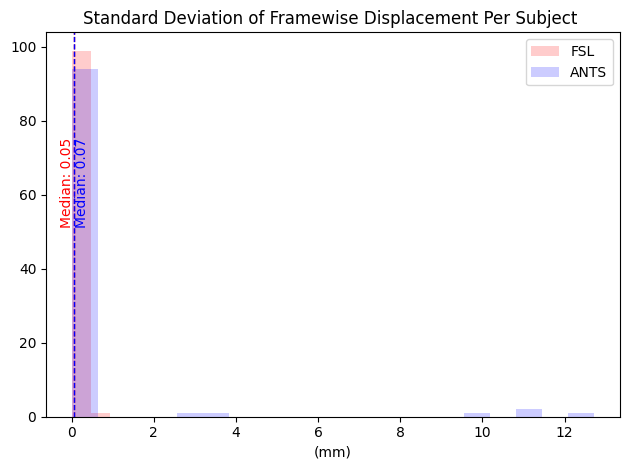

In [24]:
hist_plotter(np.std(FSL_all, axis=1), np.std(ANTS_all, axis=1), "Standard Deviation of Framewise Displacement Per Subject ", bins=[2,20], s=1.1, labels=["FSL", "ANTS"], xlable="(mm)")

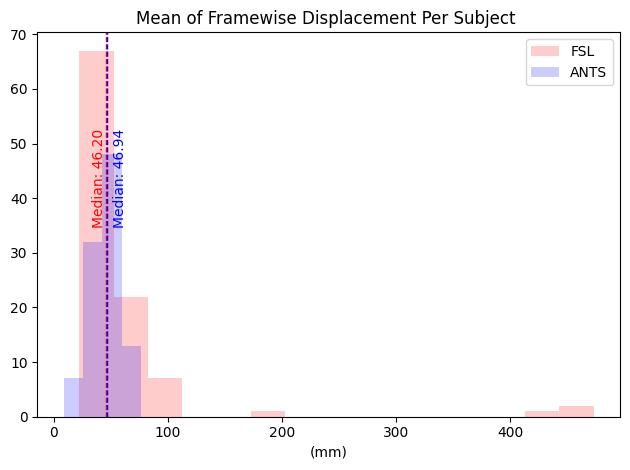

In [25]:
hist_plotter(np.mean(FSL_all, axis=1), np.mean(ANTS_all, axis=1), "Mean of Framewise Displacement Per Subject ", bins=[15,4], s=1.1, labels=["FSL", "ANTS"], xlable="(mm)")

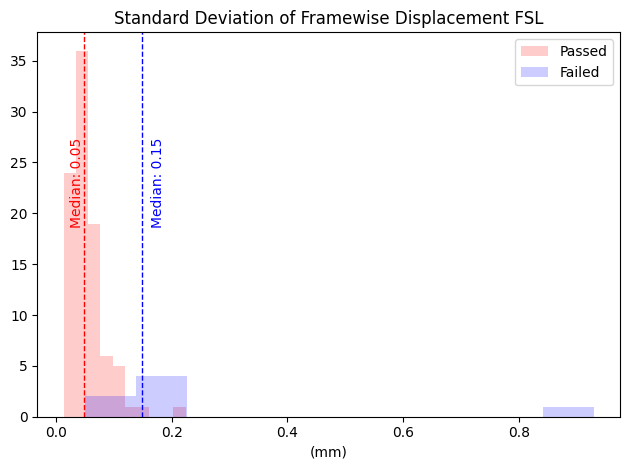

In [10]:
hist_plotter(np.std(FSL_fine, axis=1), np.std(FSL_fail, axis=1), "Standard Deviation of Framewise Displacement FSL", s=1.1, labels=["Passed", "Failed"], xlable="(mm)")

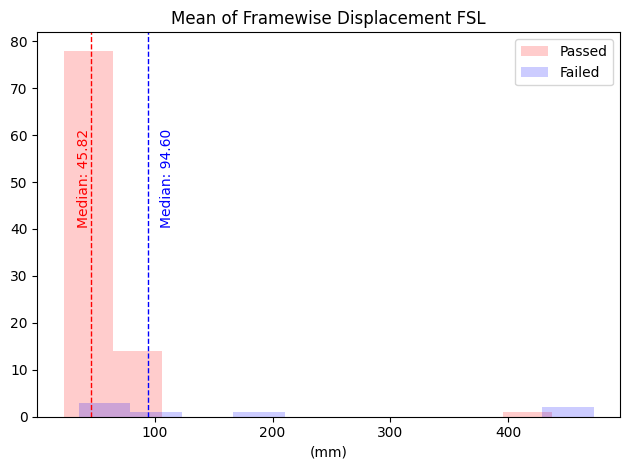

In [11]:
hist_plotter(np.mean(FSL_fine, axis=1), np.mean(FSL_fail, axis=1), "Mean of Framewise Displacement FSL", s=1.1, labels=["Passed", "Failed"], xlable="(mm)")

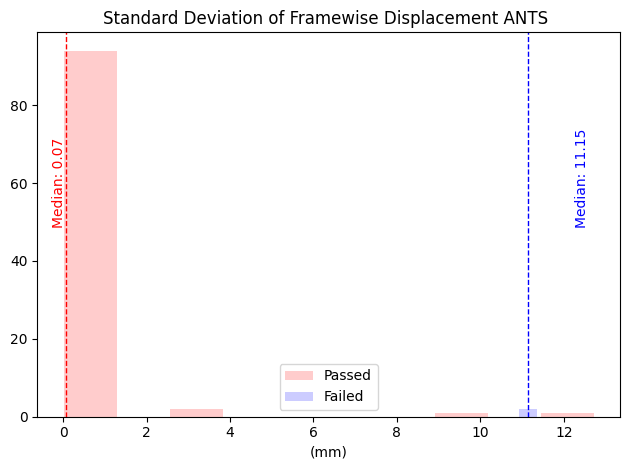

In [12]:
hist_plotter(np.std(ANTS_fine, axis=1), np.std(ANTS_fail, axis=1), "Standard Deviation of Framewise Displacement ANTS ", bins=[10,1], s=1.1, labels=["Passed", "Failed"],xlable="(mm)")

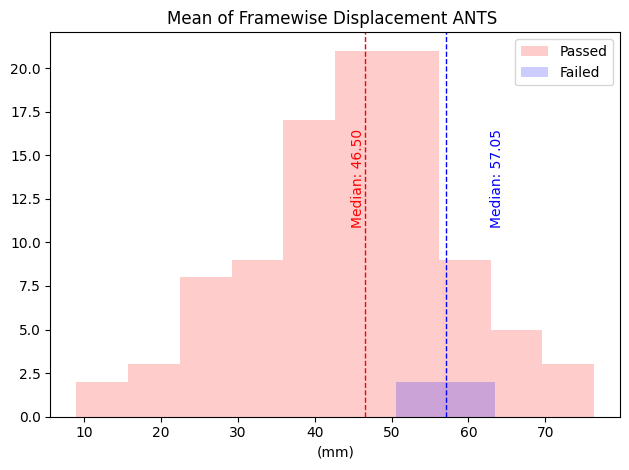

In [14]:
hist_plotter(np.mean(ANTS_fine, axis=1), np.mean(ANTS_fail, axis=1), "Mean of Framewise Displacement ANTS ", bins=[10,1], s=1.1, labels=["Passed", "Failed"], xlable="(mm)")

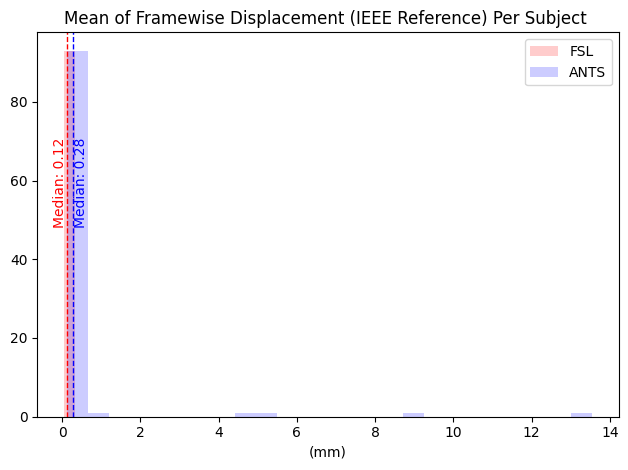

In [15]:
hist_plotter(np.mean(FSL_fine_ref, axis=1), np.mean(ANTS_fine_ref, axis=1), "Mean of Framewise Displacement (IEEE Reference) Per Subject ", bins=[1,25], s=1.1, labels=["FSL", "ANTS"], xlable="(mm)")

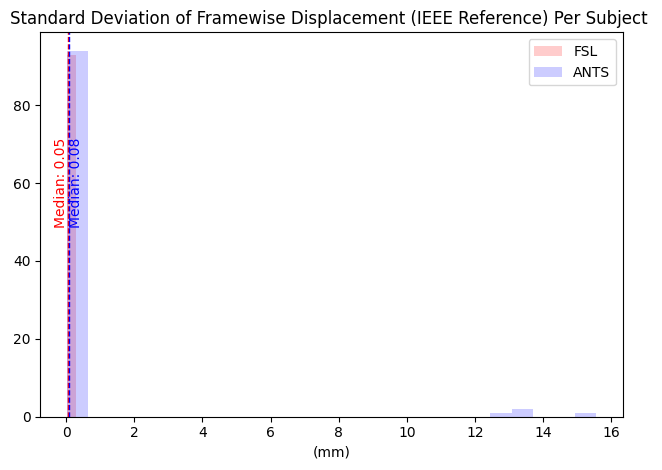

In [16]:
hist_plotter(np.std(FSL_fine_ref, axis=1), np.std(ANTS_fine_ref, axis=1), "Standard Deviation of Framewise Displacement (IEEE Reference) Per Subject ", bins=[1,25], s=1.1, labels=["FSL", "ANTS"], xlable="(mm)")

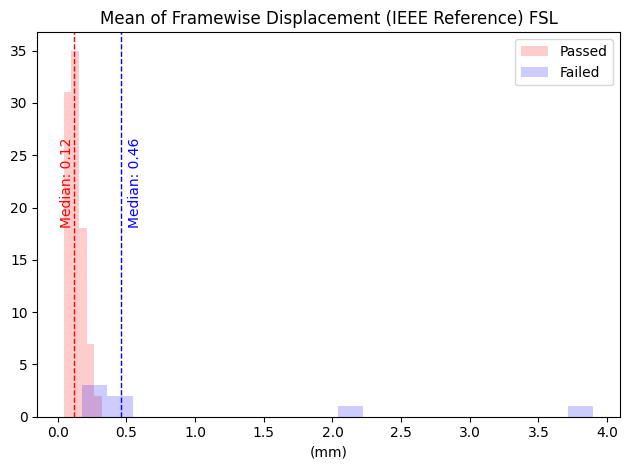

In [17]:
hist_plotter(np.mean(FSL_fine_ref, axis=1), np.mean(FSL_fail_re, axis=1), "Mean of Framewise Displacement (IEEE Reference) FSL", s=1.1, labels=["Passed", "Failed"], xlable="(mm)", bins=[5,20])

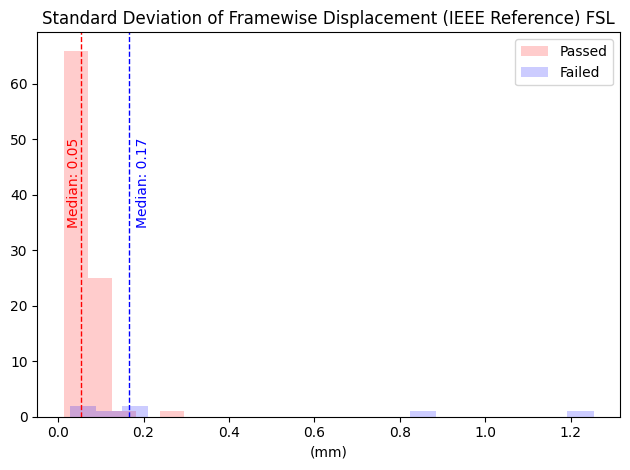

In [18]:
hist_plotter(np.std(FSL_fine_ref, axis=1), np.std(FSL_fail_re, axis=1), "Standard Deviation of Framewise Displacement (IEEE Reference) FSL", s=1.1, labels=["Passed", "Failed"], xlable="(mm)", bins=[5,20])

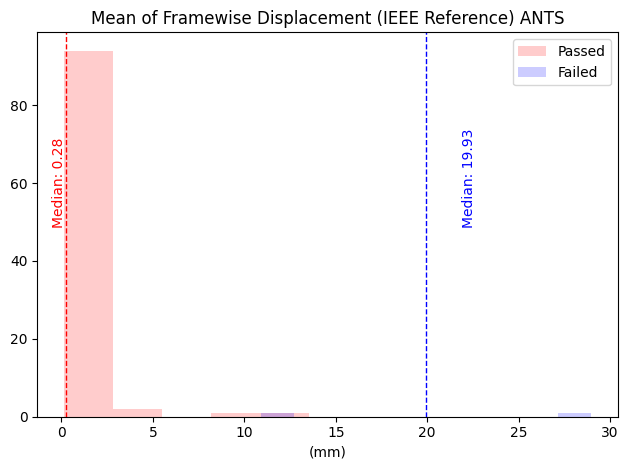

In [19]:
hist_plotter(np.mean(ANTS_fine_ref, axis=1), np.mean(ANTS_fail_re, axis=1), "Mean of Framewise Displacement (IEEE Reference) ANTS", s=1.1, labels=["Passed", "Failed"], xlable="(mm)", bins=[5,10])

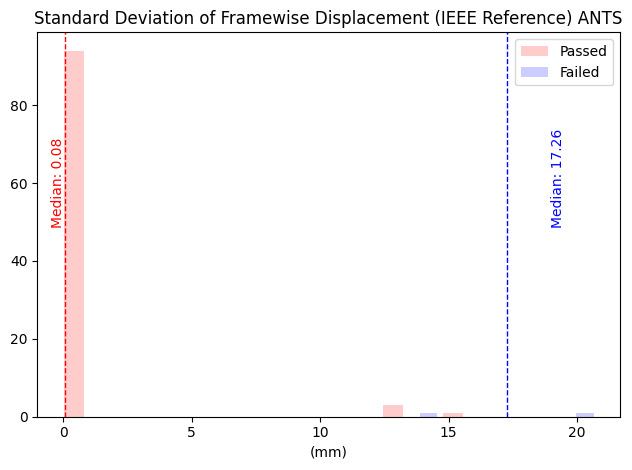

In [20]:
hist_plotter(np.std(ANTS_fine_ref, axis=1), np.std(ANTS_fail_re, axis=1), "Standard Deviation of Framewise Displacement (IEEE Reference) ANTS", s=1.1, labels=["Passed", "Failed"], xlable="(mm)", bins=[20,10])

In [25]:
np.median(ANTS_fine_ref)

0.14545871899615434

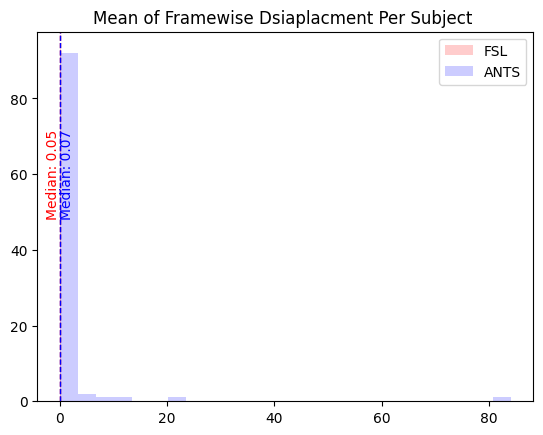

In [26]:
hist_plotter(np.std(FSL_fine_ref, axis=1), np.std(ANTS_fine_ref, axis=1), "Mean of Framewise Dsiaplacment (IEEE Reference) Per Subject ", bins=[1,25], s=1.1, labels=["FSL", "ANTS"])

In [2]:
import pandas as pd

In [7]:
a = pd.read_csv("fds.csv",index_col=0)
a["new_fd"]

sub-40882     [0.478935   1.03420548 0.18912724 0.55988709 0...
sub-179784    [0.1532619  0.07554015 0.14124364 0.09831164 0...
sub-75562     [0.11610879 0.12830807 0.08070849 0.07423602 0...
sub-3001      [ 13.51262248 290.08396971   1.13597087  15.16...
sub-3078      [0.15168137 0.3822096  0.57223792 0.19977887 0...
                                    ...                        
sub-101039    [0.16327813 0.17504056 0.10985342 0.5182364  0...
sub-3569      [0.08695116 0.07749513 0.07135463 0.0427915  0...
sub-3112      [0.04202143 0.04061178 0.06592915 0.05209396 0...
sub-3157      [2.66182775 3.2490865  3.03298107 1.51036515 2...
sub-3852      [0.18317726 0.15618193 0.08507997 0.09660913 0...
Name: new_fd, Length: 100, dtype: object

In [42]:
import pandas as pd
import ast

# Load the data
a = pd.read_csv("fds.csv", index_col=0)
# a = pd.read_csv("fds_fsl.csv", index_col=0)

# Function to convert the malformed string list to a proper list
def convert_to_list(string):
    # Remove brackets and split by space, then filter empty strings
    elements = string.strip('[]').split()
    # Convert elements to float
    return [float(element) for element in elements]

# Apply the function to each element in the 'new_fd' column
a['new_fd'] = a['new_fd'].apply(convert_to_list)

# Check the data
print(a.head())


                                                       new_fd  \
sub-40882   [0.478935, 1.03420548, 0.18912724, 0.55988709,...   
sub-179784  [0.1532619, 0.07554015, 0.14124364, 0.09831164...   
sub-75562   [0.11610879, 0.12830807, 0.08070849, 0.0742360...   
sub-3001    [13.51262248, 290.08396971, 1.13597087, 15.164...   
sub-3078    [0.15168137, 0.3822096, 0.57223792, 0.19977887...   

                                                       old_fd Group  
sub-40882   [84.11902508 83.65765391 84.61906866 84.066715...    PD  
sub-179784  [116.10737741 115.95371933 116.06615525 116.04...    PD  
sub-75562   [160.45824524 160.45688389 160.43707712 160.46...    PD  
sub-3001    [215.47566899 220.29093826 204.3974862  216.78...    PD  
sub-3078    [155.37062955 155.17030042 155.08525017 155.23...    PD  


In [43]:
# Explode the 'new_fd' column into multiple rows
a_exploded = a.explode('new_fd')

# Convert the elements in 'new_fd' to numeric type
a_exploded['new_fd'] = pd.to_numeric(a_exploded['new_fd'])

print(a_exploded.head())


             new_fd                                             old_fd Group
sub-40882  0.478935  [84.11902508 83.65765391 84.61906866 84.066715...    PD
sub-40882  1.034205  [84.11902508 83.65765391 84.61906866 84.066715...    PD
sub-40882  0.189127  [84.11902508 83.65765391 84.61906866 84.066715...    PD
sub-40882  0.559887  [84.11902508 83.65765391 84.61906866 84.066715...    PD
sub-40882  0.678519  [84.11902508 83.65765391 84.61906866 84.066715...    PD


In [33]:
len(a)

100

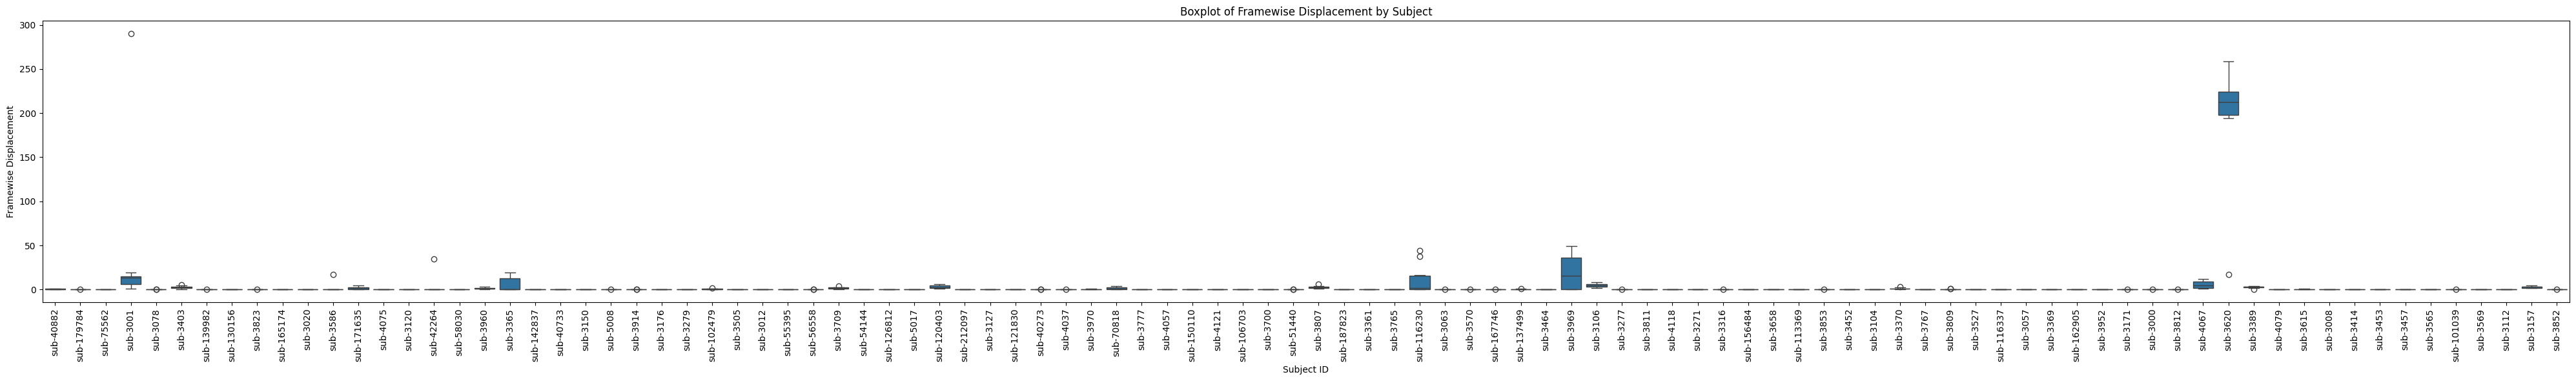

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot
plt.figure(figsize=(40, 6))
sns.boxplot(data=a_exploded.reset_index()
, x='index', y='new_fd')
plt.xticks(rotation=90)
plt.title('Boxplot of Framewise Displacement by Subject')
plt.ylabel('Framewise Displacement')
plt.xlabel('Subject ID')
plt.tight_layout()
plt.show()
